In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display

pd.options.display.max_columns = 50
pd.options.display.max_rows = 200
plt.rcParams['figure.figsize'] = [16, 9]

## Solution: Titanic
You may be familiar with the Titanic data set from other events. Here, various features are used to predict whether a Titanic passenger survived the disaster. Reading in the data, rough pre-processing and splitting into training and test sets are already predefined here. 

In [8]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("../data/titanic.csv")
# We are removing some features to make the problem clearer
df = df.drop(["PassengerId", "Name","Ticket", "Cabin"], axis=1)
# We remove those passengers for whom the age is not specified
df = df[df["Age"].isna() == False]

# Label: survived yes/no
y = df.pop("Survived")
# Features including one-hot encoding of the categorical
X = pd.get_dummies(df)

# Split in Trainings- und Testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
328,3,31.0,1,1,20.5250,True,False,False,False,True
73,3,26.0,1,0,14.4542,False,True,True,False,False
253,3,30.0,1,0,16.1000,False,True,False,False,True
719,3,33.0,0,0,7.7750,False,True,False,False,True
666,2,25.0,0,0,13.0000,False,True,False,False,True
30,1,40.0,0,0,27.7208,False,True,True,False,False
287,3,22.0,0,0,7.8958,False,True,False,False,True
217,2,42.0,1,0,27.0000,False,True,False,False,True
797,3,31.0,0,0,8.6833,True,False,False,False,True
371,3,18.0,1,0,6.4958,False,True,False,False,True


## Task 1: Train a decision tree for the example. 
Take a look at the notebook ``Exercise 11 - Examples Decision Tree.ipynb``. Visualize your result with ``plot_tree()``.
Experiment with the hyperparameters ``max_depth`` and ``min_samples_split``. What do these parameters mean? How does the performance (accuracy, precision, recall) change on the training and test data?

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score, precision_score

m = DecisionTreeClassifier(max_depth=None, min_samples_split=2)
m.fit(X_train, y_train)

y_pred_train = m.predict(X_train)
y_pred_test = m.predict(X_test)

print(f"{'Accuracy Train':17} {accuracy_score(y_train, y_pred_train):10.5f}, {'Accuracy Test':17} {accuracy_score(y_test, y_pred_test):10.5f}")
print(f"{'Recall Train':17} {recall_score(y_train, y_pred_train):10.5f}, {'Recall Test':17} {recall_score(y_test, y_pred_test):10.5f}")
print(f"{'Precision Train':17} {precision_score(y_train, y_pred_train):10.5f}, {'Precision Test':17} {precision_score(y_test, y_pred_test):10.5f}")

plt.rcParams['figure.figsize'] = [24, 16]
#nodes = plot_tree(m, rounded=True, filled=True, fontsize=10, class_names=["Not Survived", "Survived"], feature_names=X_train.columns)

m.get_depth()

Accuracy Train       0.99124, Accuracy Test        0.72028
Recall Train         0.97863, Recall Test          0.64286
Precision Train      1.00000, Precision Test       0.64286


18

## Task 2: Hyperparameter optimization.
a) Find the best value for the tree depth using hyperparameter tuning and 5-fold cross-validation.

b) [optional] Find the best *combination* of tree depth and minimum number of examples required for a split using hyperparameter tuning and 5-fold cross-validation.

In [13]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=10)
mean_scores = []
stddev_scores = []

# Loop over all max_depths that we want to try out
max_depths = range(19)
min_samples = [2, 10, 20, 50, 100]
best_combination = {"max_depth": None, "min_samples": 2}
best_mean_score = 0
for max_depth in max_depths:
    for min_sample in min_samples:
        scores = []
        # Loop over 5 different training/test splits
        for train_index, test_index in kf.split(X_train):
            X_trainK, X_testK = X_train.values[train_index], X_train.values[test_index]
            y_trainK, y_testK = y_train.values[train_index], y_train.values[test_index]
            m = DecisionTreeClassifier(max_depth=max_depth+1, min_samples_split=min_sample)
            m.fit(X_trainK, y_trainK)
            scores.append(m.score(X_testK, y_testK))
        mean_score = np.mean(np.array(scores))
        if mean_score > best_mean_score:
            best_combination["max_depth"] = max_depth
            best_combination["min_samples"] = min_sample
            best_mean_score = mean_score

best_max_depth = best_combination["max_depth"]
best_min_samples = best_combination["min_samples"]
m = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples)
m.fit(X_train, y_train)
print(f"Best max_depth={best_max_depth}, best min_samples_split={best_min_samples}. (mean score={best_mean_score})")

y_pred_train = m.predict(X_train)
y_pred_test = m.predict(X_test)

print(f"{'Accuracy Train':17} {accuracy_score(y_train, y_pred_train):10.5f}, {'Accuracy Test':17} {accuracy_score(y_test, y_pred_test):10.5f}")
print(f"{'Recall Train':17} {recall_score(y_train, y_pred_train):10.5f}, {'Recall Test':17} {recall_score(y_test, y_pred_test):10.5f}")
print(f"{'Precision Train':17} {precision_score(y_train, y_pred_train):10.5f}, {'Precision Test':17} {precision_score(y_test, y_pred_test):10.5f}")

Best max_depth=4, best min_samples_split=2. (mean score=0.7916399694889399)
Accuracy Train       0.84939, Accuracy Test        0.75524
Recall Train         0.80342, Recall Test          0.69643
Precision Train      0.82456, Precision Test       0.68421


## Task 3: Repeat task 2 with a logistic regression.
You can use the class ``LogisticRegressionCV`` instead of the class ``LogisticRegression``. This performs a cross-validation for the regularization parameter ``C``. Create a model with the parameter ``penalty="l2"`` and select 10 values for ``C`` and a 5-fold cross-validation. What is the (mathematical) meaning of ``C``?

In [11]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression


#m_lr = LogisticRegression(penalty="none", max_iter=2000)
m_lr = LogisticRegressionCV(penalty="l2", Cs=10, cv=5, max_iter=2000)
m_lr.fit(X_train, y_train)

y_pred_train = m_lr.predict(X_train)
y_pred_test = m_lr.predict(X_test)

print(f"{'Accuracy Train':17} {accuracy_score(y_train, y_pred_train):10.5f}, {'Accuracy Test':17} {accuracy_score(y_test, y_pred_test):10.5f}")
print(f"{'Recall Train':17} {recall_score(y_train, y_pred_train):10.5f}, {'Recall Test':17} {recall_score(y_test, y_pred_test):10.5f}")
print(f"{'Precision Train':17} {precision_score(y_train, y_pred_train):10.5f}, {'Precision Test':17} {precision_score(y_test, y_pred_test):10.5f}")

Accuracy Train       0.80911, Accuracy Test        0.76224
Recall Train         0.71368, Recall Test          0.62500
Precision Train      0.79904, Precision Test       0.72917


## Task 4: Compare both models in a ROC plot.
What statements can you derive from the plot?

Hint:
https://scikit-learn.org/dev/modules/generated/sklearn.metrics.roc_curve.html

https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py



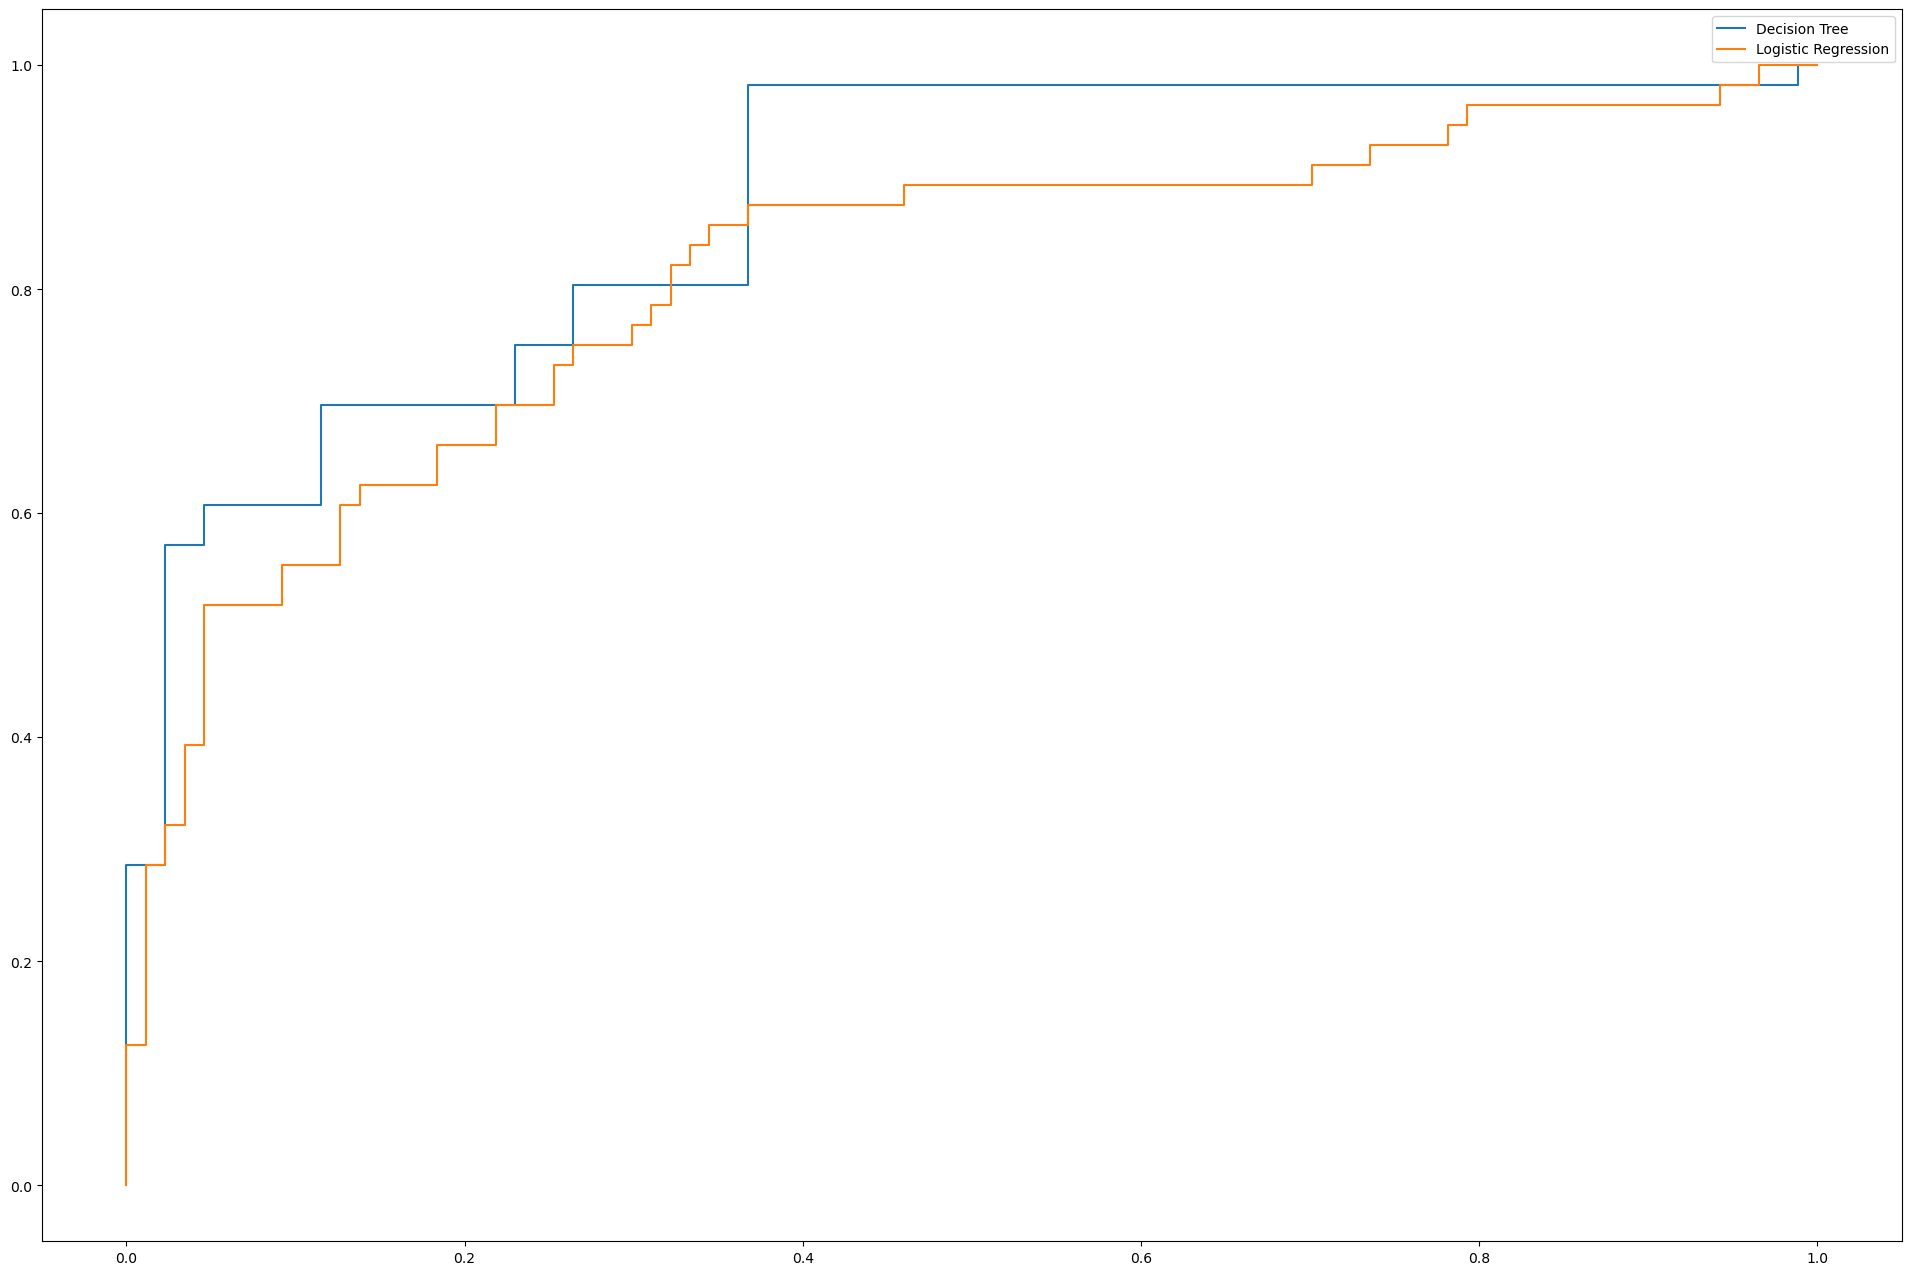

In [12]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, m.predict_proba(X_test)[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, m_lr.predict_proba(X_test)[:,1])

plt.step(x=fpr_dt, y=tpr_dt, label="Decision Tree")
plt.step(x=fpr_lr, y=tpr_lr, label="Logistic Regression")
plt.legend()

For most threshold values, the decision tree delivers better results, i.e. more true positives with fewer false positives.